<h1 style="text-align:center">Diet Recommendation</h1>
<h3 style="text-align:center"> By: <a href="https://github.com/uumaaa">Iker Antonio Pluma Amaro</a> & <a href="https://github.com/AlvaroVasquezAI">Álvaro García Vásquez</a></h3>

Table of Contents:
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Modeling](#Modeling)
4. [Evaluation](#Evaluation)

<h2 style = "text-align:center">Introduction</h2><a name="Introduction"></a>

The objective of this notebook is to create a model that recommends recipes to users based on their preferences.

<h2 style = "text-align:center">Data Description</h2><a name="Data-Description"></a>

The dataset used is [Diets, Recipes, And Their Nutrients](https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset) which contains information about diets, recipes, and their nutrients. 

The dataset contains a file All_Diets.csv, which contains recipes from different diets and cuisines, all with the aim of providing healthy and nutritious meal options

- Diet_type: The type of diet the recipe is for. (String)
- Recipe_name: The name of the recipe. (String)
- Cuisine_type: The cuisine the recipe is from. (String)
- Protein(g): The amount of protein in grams. (Float)
- Carbs(g): The amount of carbs in grams. (Float)
- Fat(g): The amount of fat in grams. (Float)
- Extraction_day: The day the recipe was extracted. (String)

### Data Cleaning
After analyzing the data, we have created a new dataset that contains the information of the recipes and the diets.

- Recipe_name: The name of the recipe. (String)
- Protein: The amount of protein in grams. (Float)
- Carbs: The amount of carbs in grams. (Float)
- Fat: The amount of fat in grams. (Float)
- Extraction_day: The day the recipe was extracted. (String)
- Diet_type_dash: The recipe is for a dash diet. (Boolean)
- Diet_type_keto: The recipe is for a keto diet. (Boolean)
- Diet_type_mediterranean: The recipe is for a mediterranean diet. (Boolean)
- Diet_type_paleo: The recipe is for a paleo diet. (Boolean)
- Diet_type_vegan: The recipe is for a vegan diet. (Boolean)
- Cuisine_type_american: The recipe is from the american cuisine. (Boolean)
- Cuisine_type_asian: The recipe is from the asian cuisine. (Boolean)
- Cuisine_type_british: The recipe is from the british cuisine. (Boolean)
- Cuisine_type_caribbean: The recipe is from the caribbean cuisine. (Boolean)
- Cuisine_type_central europe: The recipe is from the central europe cuisine. (Boolean)
- Cuisine_type_chinese: The recipe is from the chinese cuisine. (Boolean)
- Cuisine_type_eastern europe: The recipe is from the eastern europe cuisine. (Boolean)
- Cuisine_type_french: The recipe is from the french cuisine. (Boolean)
- Cuisine_type_indian: The recipe is from the indian cuisine. (Boolean)
- Cuisine_type_italian: The recipe is from the italian cuisine. (Boolean)
- Cuisine_type_japanese: The recipe is from the japanese cuisine. (Boolean)
- Cuisine_type_kosher: The recipe is from the kosher cuisine. (Boolean)
- Cuisine_type_mediterranean: The recipe is from the mediterranean cuisine. (Boolean)
- Cuisine_type_mexican: The recipe is from the mexican cuisine. (Boolean)
- Cuisine_type_middle eastern: The recipe is from the middle eastern cuisine. (Boolean)
- Cuisine_type_nordic: The recipe is from the nordic cuisine. (Boolean)
- Cuisine_type_south american: The recipe is from the south american cuisine. (Boolean)
- Cuisine_type_south east asian: The recipe is from the south east asian cuisine. (Boolean)
- Cuisine_type_world: The recipe is from the world cuisine. (Boolean)

### Data Preprocessing
Once having the data, we have created JSON files that contain the information of the recipes and the diets. All this information is used to create the model.

- recipes_data.json: Contains the information of the recipes.

```json
{
    "recipe_name": {
    "protein": float,
    "carbs": float,
    "fats": float
    }
}

- tagged_data.json: Contains the information of the diets.

```json
[
    {
    "nouns": ["noun1", "noun2", "noun3", "noun4"],
    "adjectives": ["adjective1", "adjective2", "adjective3"]
    }
]
```
- vector_to_idx.json: Contains the information of the vector to index.

```json
{
 "[vector]": "name_recipe"
}

```

<h2 style = "text-align:center">Modeling</h2><a name="Modeling"></a>

### Libraries

In [1]:
import json
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import TfidfVectorizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Functions

In [2]:
def loadData():
    # Load data
    with open('Data/recipes_data.json', 'r') as file:
        recipes_data = json.load(file)
    with open('Data/tagged_diets.json', 'r') as file:
        tagged_diets = json.load(file)
    with open('Data/vector_to_idx.json', 'r') as file:
        vector_to_idx = json.load(file)

    # Convert vectors to numpy arrays
    vector_keys = [np.fromstring(key[1:-1], sep=' ') for key in vector_to_idx.keys()]
    vector_values = [vector_to_idx[key] for key in vector_to_idx.keys()]

    # Make sure all vectors have the same length
    embedding_size = len(vector_keys[0])
    vector_keys = np.array([np.pad(vector, (0, embedding_size - len(vector)), 'constant') for vector in vector_keys])

    return recipes_data, tagged_diets, vector_to_idx, vector_keys, vector_values, embedding_size

def createKDTree(vector_keys):
    # Create KDTree
    kdtree = KDTree(vector_keys)

    return kdtree

def get_nearest_recipes(user_vector, kdtree, vector_values, K):
    # Ensure user_vector is 2D
    user_vector = user_vector.reshape(1, -1)
    # Find the nearest recipes
    distances, indices = kdtree.query(user_vector, k=K)
    # Get the nearest recipes
    nearest_recipes = [vector_values[idx] for idx in indices[0]]
    
    return nearest_recipes, indices[0], distances[0]

def get_user_vector(vector_keys, vector_values, index):
    # Index from recipe_data
    Index = int(index)
    # Get the user vector
    user_vector = vector_keys[Index] 
    # Get the user vector description
    user_vector_description = vector_values[Index]
    return user_vector, user_vector_description

def update_user_vector(user_vector, selected_recipe_vector):

    updated_user_vector = (user_vector + selected_recipe_vector) / 2

    updated_user_vector = updated_user_vector.reshape(1, -1)

    return updated_user_vector

def plot_vectors(vectors, labels, user_vector=None, title="3D Vector Plot"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    
    for vector, label in zip(vectors, labels):
        ax.scatter(vector[0], vector[1], vector[2], label=label)
    
    if user_vector is not None:
        user_vector = user_vector.flatten()
        ax.scatter(user_vector[0], user_vector[1], user_vector[2], color='red', label='User Vector', s=100)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(prop={'size': 6})
    plt.show()


### Initial vector 
(Representation of the user's preferences)

In [3]:
# Load data
recipes_data, tagged_diets, vector_to_idx, vector_keys, vector_values,  embedding_size = loadData()

# Create KDTree
kdtree = createKDTree(vector_keys)

# Get 1 vector for the user (This will be the initial vector representing the user)
user_vector, user_vector_description = get_user_vector(vector_keys, vector_values, 186)

print(f"Recipe: {user_vector_description} - {recipes_data[user_vector_description]}")
print(f"Vector: {user_vector}")


Recipe: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Vector: [ 0.03351973 -0.22357196 -0.13585091 -0.04860048  0.00232652 -0.1128104
 -0.05346972  0.44343197 -0.13200735  0.17503196  0.17930599 -0.09901922
 -0.33812666  0.12660681 -0.16484104 -0.13017346  0.39948985 -0.01258375
 -0.05030153  0.19031493 -0.14165279 -0.10481671  0.36716282  0.27264491
  0.17904794 -0.02536304 -0.32408816 -0.23312713 -0.09863407 -0.18664111
  0.02872077  0.18317337 -0.10095844 -0.29419103 -0.31201795 -0.00882036
  0.49858388  0.10375724  0.18541415 -0.2464032  -0.03586944 -0.1308694
 -0.38863382 -0.2055196   0.25372621  0.00682342  0.11973528 -0.04652828
  0.16271706  0.09282757 -0.15302838 -0.03121725 -0.27460578  0.1012172
 -0.04563835  0.20620595 -0.03295114  0.18667258 -0.17674287  0.04752791
 -0.17765731 -0.3204371   0.00131429 -0.02222385  0.00362915  0.08627092
 -0.17589925 -0.34016082 -0.5392713  -0.37934732  0.16794117  0.20684575
  0.03798101 -0.4149251

### Nearest recipes 
(Recommendation of recipes)

In [4]:
nearest_recipes, indices, distances = get_nearest_recipes(user_vector, kdtree, vector_values, 10)

In [5]:
indices

array([ 186, 3207, 2252, 4558, 4973, 3836, 4069, 1905, 3937,  632],
      dtype=int64)

In [6]:
nearest_recipes

['chicken salad with date walnut whole',
 'one pan shrimp and asparagus',
 'tofu pesto',
 'book stuffed baby eggplant and zucchini in pomegranate sauce',
 'chickpea wrap',
 'salmon risotto',
 'vinaigrette for pasta salad',
 'basil thai noodle with bison and zucchini spicy quick pickled cucumber',
 'style tuna',
 'chicken salad with grape apple and cranberry']

In [7]:
distances

array([0.        , 0.15063915, 0.151953  , 0.16250052, 0.16894933,
       0.17379821, 0.17476413, 0.17644964, 0.18404058, 0.18610328])

In [8]:
for idx, recipe in enumerate(nearest_recipes):
    recipe_index = indices[idx]
    print(f"Recipe {idx}: {recipe} - {recipes_data[recipe]}")
    #print(f"Vector: {vector_keys[recipe_index]}")
    print(f"Distance: {distances[idx]}")
    print("\n")

Recipe 0: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.0


Recipe 1: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Distance: 0.15063914840895382


Recipe 2: tofu pesto - {'protein': 49.91, 'carbs': 68.57, 'fats': 242.68}
Distance: 0.15195299968784037


Recipe 3: book stuffed baby eggplant and zucchini in pomegranate sauce - {'protein': 148.0, 'carbs': 503.8, 'fats': 1004.58}
Distance: 0.1625005200748572


Recipe 4: chickpea wrap - {'protein': 13.99, 'carbs': 106.7, 'fats': 31.26}
Distance: 0.16894932574379073


Recipe 5: salmon risotto - {'protein': 395.5, 'carbs': 287.1, 'fats': 291.04}
Distance: 0.1737982135002026


Recipe 6: vinaigrette for pasta salad - {'protein': 23.57, 'carbs': 49.84, 'fats': 180.53}
Distance: 0.17476413147584116


Recipe 7: basil thai noodle with bison and zucchini spicy quick pickled cucumber - {'protein': 130.67, 'carbs': 270.48, 'fats': 126.89}
Distance: 0.1764496416041

### Update user vector 
(Choosing a recipe from the recommendations and updating the user position) 

$Vector_{new} = \frac{Vector_{old} + Vector_{recipe}}{2}$

In [9]:
# Choose the 6th recipe
number_of_recipe = 9
new_recipe = indices[number_of_recipe]

# Update user vector from the 10 nearest recipes
new_user_vector= update_user_vector(user_vector, vector_keys[new_recipe])

print(f"Vector: {new_user_vector}")

Vector: [[ 0.03950755 -0.2262219  -0.13297526 -0.04929493  0.00464608 -0.09999868
  -0.04602518  0.44755928 -0.1264256   0.16256971  0.17508654 -0.09646684
  -0.34387179  0.11380527 -0.15410423 -0.12489516  0.39887478 -0.01588611
  -0.05014847  0.18893639 -0.14174618 -0.11353006  0.37605466  0.27635882
   0.16785968 -0.03106301 -0.3158398  -0.24496541 -0.09802448 -0.18859397
   0.01521645  0.18763733 -0.09117592 -0.30591007 -0.31783375 -0.01855224
   0.49148461  0.09430243  0.18793486 -0.2546511  -0.03157283 -0.13202734
  -0.37371878 -0.20304342  0.25268782 -0.01435525  0.10787542 -0.04523034
   0.16224002  0.09826441 -0.14284958 -0.02344538 -0.2765149   0.1001393
  -0.03780893  0.21316531 -0.03788188  0.18989595 -0.1800574   0.04526563
  -0.18397622 -0.30821776 -0.0045441  -0.01754368  0.010316    0.09618716
  -0.17542271 -0.33564149 -0.54427963 -0.37323811  0.16228304  0.20182577
   0.02438419 -0.404835   -0.06681079 -0.11582602 -0.02644162 -0.1459432
  -0.28383098  0.2783704   0.131

### New recipes 
(New recommendations)

In [10]:
new_nearest_recipes, new_indices, new_distances = get_nearest_recipes(new_user_vector, kdtree, vector_values, 10)

for idx, recipe in enumerate(new_nearest_recipes):
    recipe_index = new_indices[idx]
    print(f"Recipe {idx}: {recipe} - {recipes_data[recipe]}")
    #print(f"Vector: {vector_keys[recipe_index]}")
    print(f"Distance: {new_distances[idx]}")
    print("\n")

Recipe 0: chicken salad with grape apple and cranberry - {'protein': 101.36, 'carbs': 118.91, 'fats': 252.23}
Distance: 0.0930516420222992


Recipe 1: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.09305164202229924


Recipe 2: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Distance: 0.1387944244286194


Recipe 3: english pea salad - {'protein': 125.12, 'carbs': 276.04, 'fats': 149.07}
Distance: 0.13998206333798238


Recipe 4: vinaigrette for pasta salad - {'protein': 23.57, 'carbs': 49.84, 'fats': 180.53}
Distance: 0.14791765452987898


Recipe 5: basil thai noodle with bison and zucchini spicy quick pickled cucumber - {'protein': 130.67, 'carbs': 270.48, 'fats': 126.89}
Distance: 0.1499009658795544


Recipe 6: meatloaf with bacon - {'protein': 203.61, 'carbs': 23.57, 'fats': 166.41}
Distance: 0.15306119400729448


Recipe 7: roast chicken dinner potato chip with mushroom lemon and thyme - {'protein':

<h2 style = "text-align:center">Evaluation</h2><a name="Evaluation"></a>

Initial Recipe: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Recipe 0: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.0

Recipe 1: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Distance: 0.15063914840895382

Recipe 2: tofu pesto - {'protein': 49.91, 'carbs': 68.57, 'fats': 242.68}
Distance: 0.15195299968784037

Recipe 3: book stuffed baby eggplant and zucchini in pomegranate sauce - {'protein': 148.0, 'carbs': 503.8, 'fats': 1004.58}
Distance: 0.1625005200748572

Recipe 4: chickpea wrap - {'protein': 13.99, 'carbs': 106.7, 'fats': 31.26}
Distance: 0.16894932574379073

Recipe 5: salmon risotto - {'protein': 395.5, 'carbs': 287.1, 'fats': 291.04}
Distance: 0.1737982135002026

Recipe 6: vinaigrette for pasta salad - {'protein': 23.57, 'carbs': 49.84, 'fats': 180.53}
Distance: 0.17476413147584116

Recipe 7: basil thai noodle with bison and zucchini spicy quick 

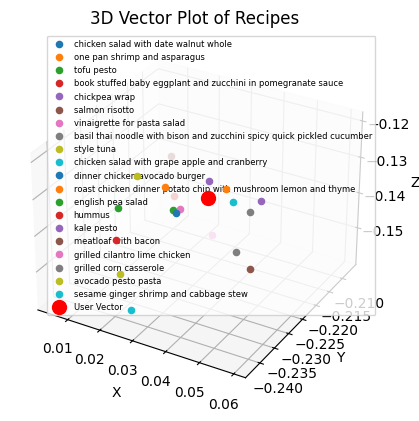

Updated Recipe: sesame ginger shrimp and cabbage stew - {'protein': 173.09, 'carbs': 219.9, 'fats': 75.42}
Recipe 0: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.10032657036724947

Recipe 1: sesame ginger shrimp and cabbage stew - {'protein': 173.09, 'carbs': 219.9, 'fats': 75.42}
Distance: 0.1003265703672495

Recipe 2: book stuffed baby eggplant and zucchini in pomegranate sauce - {'protein': 148.0, 'carbs': 503.8, 'fats': 1004.58}
Distance: 0.12973280728296246

Recipe 3: tofu pesto - {'protein': 49.91, 'carbs': 68.57, 'fats': 242.68}
Distance: 0.15314596446944942

Recipe 4: grilled corn casserole - {'protein': 16.45, 'carbs': 80.78, 'fats': 103.62}
Distance: 0.15379101771505405

Recipe 5: tofu taco - {'protein': 74.68, 'carbs': 180.41, 'fats': 66.77}
Distance: 0.16706649369373716

Recipe 6: grilled cilantro lime chicken - {'protein': 137.17, 'carbs': 20.55, 'fats': 43.28}
Distance: 0.16790083271535927

Recipe 7: garlicky mushroom

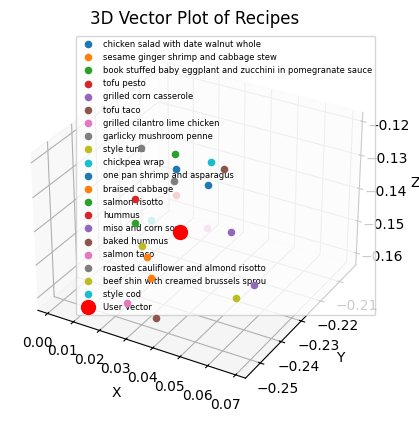

Updated Recipe: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Recipe 0: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.08788970715213845

Recipe 1: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Distance: 0.09302787890856204

Recipe 2: book stuffed baby eggplant and zucchini in pomegranate sauce - {'protein': 148.0, 'carbs': 503.8, 'fats': 1004.58}
Distance: 0.14206842302978318

Recipe 3: salmon risotto - {'protein': 395.5, 'carbs': 287.1, 'fats': 291.04}
Distance: 0.16143380364796603

Recipe 4: grilled corn casserole - {'protein': 16.45, 'carbs': 80.78, 'fats': 103.62}
Distance: 0.16530984558435552

Recipe 5: dinner chicken avocado burger - {'protein': 92.88, 'carbs': 31.09, 'fats': 92.32}
Distance: 0.1690966070115363

Recipe 6: basil thai noodle with bison and zucchini spicy quick pickled cucumber - {'protein': 130.67, 'carbs': 270.48, 'fats': 126.89}
Distance: 0.

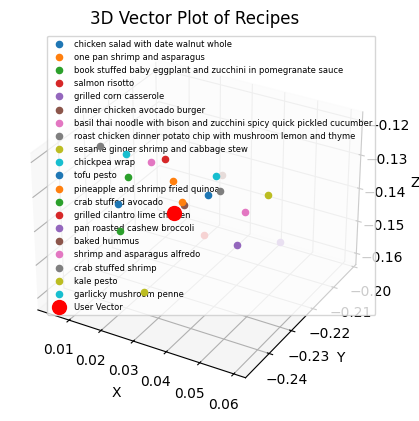

Updated Recipe: dinner chicken avocado burger - {'protein': 92.88, 'carbs': 31.09, 'fats': 92.32}
Recipe 0: dinner chicken avocado burger - {'protein': 92.88, 'carbs': 31.09, 'fats': 92.32}
Distance: 0.08454830350576814

Recipe 1: one pan shrimp and asparagus - {'protein': 63.54, 'carbs': 17.38, 'fats': 50.49}
Distance: 0.11200767414207875

Recipe 2: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.11939936817567083

Recipe 3: grilled cilantro lime chicken - {'protein': 137.17, 'carbs': 20.55, 'fats': 43.28}
Distance: 0.15789407495689253

Recipe 4: salmon risotto - {'protein': 395.5, 'carbs': 287.1, 'fats': 291.04}
Distance: 0.15943306354172435

Recipe 5: chickpea wrap - {'protein': 13.99, 'carbs': 106.7, 'fats': 31.26}
Distance: 0.1598561226819674

Recipe 6: cheesy spinach burger - {'protein': 125.38, 'carbs': 38.78, 'fats': 235.01}
Distance: 0.16240273051164397

Recipe 7: crab stuffed shrimp - {'protein': 122.29, 'carbs': 4.81, 'fats

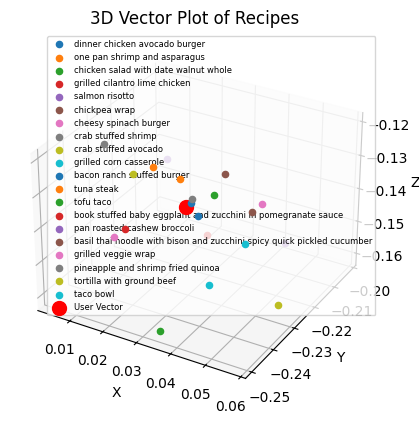

Updated Recipe: taco bowl - {'protein': 21.47, 'carbs': 11.82, 'fats': 26.3}
Recipe 0: taco bowl - {'protein': 21.47, 'carbs': 11.82, 'fats': 26.3}
Distance: 0.09295683471910976

Recipe 1: dinner chicken avocado burger - {'protein': 92.88, 'carbs': 31.09, 'fats': 92.32}
Distance: 0.10776151888627597

Recipe 2: tofu taco - {'protein': 74.68, 'carbs': 180.41, 'fats': 66.77}
Distance: 0.1430337887312511

Recipe 3: grilled corn casserole - {'protein': 16.45, 'carbs': 80.78, 'fats': 103.62}
Distance: 0.1506797032805151

Recipe 4: salmon taco - {'protein': 118.62, 'carbs': 105.19, 'fats': 115.07}
Distance: 0.15933760401189062

Recipe 5: grilled cilantro lime chicken - {'protein': 137.17, 'carbs': 20.55, 'fats': 43.28}
Distance: 0.16083006226835408

Recipe 6: chicken salad with date walnut whole - {'protein': 97.63, 'carbs': 88.59, 'fats': 98.0}
Distance: 0.1658049369932892

Recipe 7: chicken pesto burger - {'protein': 131.09, 'carbs': 14.73, 'fats': 107.32}
Distance: 0.16793493860847997

Rec

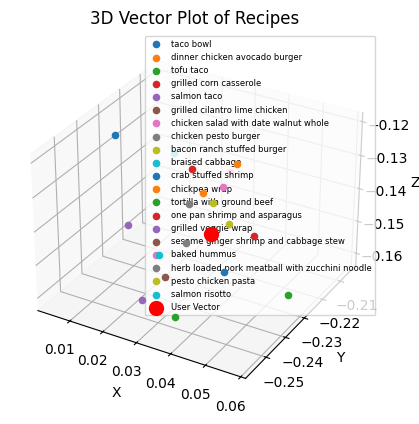

Updated Recipe: tofu taco - {'protein': 74.68, 'carbs': 180.41, 'fats': 66.77}
Recipe 0: tofu taco - {'protein': 74.68, 'carbs': 180.41, 'fats': 66.77}
Distance: 0.07151689436562554

Recipe 1: taco bowl - {'protein': 21.47, 'carbs': 11.82, 'fats': 26.3}
Distance: 0.11122944252752227

Recipe 2: salmon taco - {'protein': 118.62, 'carbs': 105.19, 'fats': 115.07}
Distance: 0.127195302168788

Recipe 3: dinner chicken avocado burger - {'protein': 92.88, 'carbs': 31.09, 'fats': 92.32}
Distance: 0.14097948535893853

Recipe 4: grilled corn casserole - {'protein': 16.45, 'carbs': 80.78, 'fats': 103.62}
Distance: 0.15203225322019556

Recipe 5: grilled cilantro lime chicken - {'protein': 137.17, 'carbs': 20.55, 'fats': 43.28}
Distance: 0.15626185038591053

Recipe 6: braised cabbage - {'protein': 21.85, 'carbs': 113.36, 'fats': 69.95}
Distance: 0.16124797324843523

Recipe 7: chicken pesto burger - {'protein': 131.09, 'carbs': 14.73, 'fats': 107.32}
Distance: 0.16728284455784004

Recipe 8: chicken s

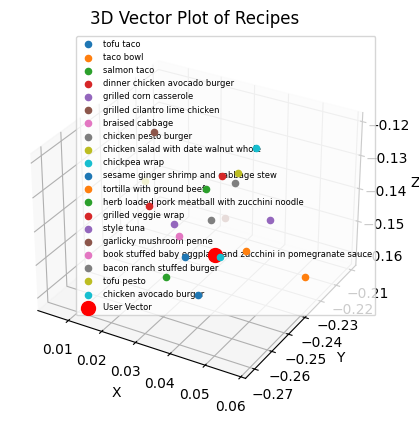

In [11]:
# Load data
recipes_data, tagged_diets, vector_to_idx, vector_keys, vector_values, embedding_size = loadData()
# Create KDTree
kdtree = createKDTree(vector_keys)
# Initial user vector
user_vector, user_vector_description = get_user_vector(vector_keys, vector_values, 186)

print(f"Initial Recipe: {user_vector_description} - {recipes_data[user_vector_description]}")

while True:
    nearest_recipes, indices, distances = get_nearest_recipes(user_vector, kdtree, vector_values, 20)
    
    for idx, recipe in enumerate(nearest_recipes):
        recipe_index = indices[idx]
        print(f"Recipe {idx}: {recipe} - {recipes_data[recipe]}")
        print(f"Distance: {distances[idx]}\n")
    
    # Plot the vectors
    plot_vectors(vector_keys[indices], nearest_recipes, user_vector, title="3D Vector Plot of Recipes")
    
    # User selects a recipe
    selection = int(input("Select a recipe index or -1 to quit: "))
    if selection == -1:
        break
    
    user_vector = update_user_vector(user_vector, vector_keys[indices[selection]])
    user_vector_description = nearest_recipes[selection]
    print(f"Updated Recipe: {user_vector_description} - {recipes_data[user_vector_description]}")